# HW1  Gradient descent (Due: January 19, 2024, 11:59 PM) 


Please submit this Jupyter notebook with your solutions. The solutions should include the code, explanations, and the output of all the cells. Submitting your solutions without running the code will lead to a deduction of points.

For problems that require a cost function as input, you should always use the most recent cost function that you have implemented (unless specified otherwise). 

Also, note that you should cite all the references you refer to under each question. Proper referencing is essential for academic integrity, giving credit to original authors, avoiding plagiarism, and providing a traceable path for verification. Please check the course syllabus for more details about academic integrity.

Your name: Andrew Koulogeorge (TA)

0) [0 points] You are allowed to engage in discussions about homework assignments; however, it is crucial that you independently write down your own code and solutions. Additionally, if you discuss the assignment with other students, please explicitly mention their names below.

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{33}\left(w^3 + w^2 + 33w - 33 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{11}w^2 + \frac{2}{33}w + 1$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [118]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)

def g(x):
    return 1/33 * (x ** 3 + x ** 2 + 33*x - 33)


def gradient_descent(alpha, max_its, w0):

    x = w0
    cost_history = [g(x)]

    for _ in range(max_its):
        x = x - (alpha * ((1/11 * x**2) + (2/33 * x) + 1))
        cost_history.append(g(x))

    return cost_history

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.95
max_its = 500

# first run
alpha = 0.01
# second run
alpha = 0.005
# third run
alpha = 0.001


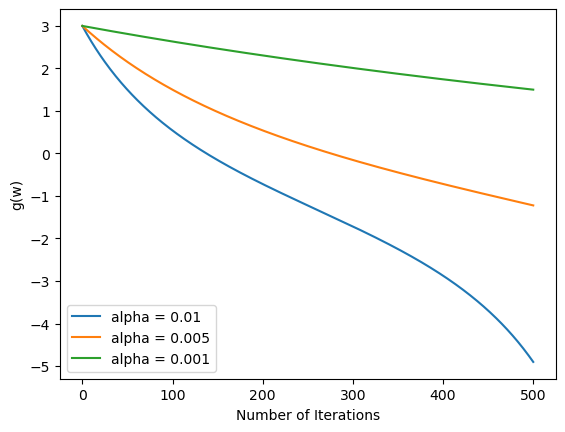

In [119]:
import matplotlib.pyplot as plt
#%matplotlib inline # To keep your plots embedded

# NOTE TO THE STUDENTS THE DIFFEREENCE BETWEEN THE FUNCTION SEEN ON THE LECTURE SLIDES WHICH IS CONVEX AND HAS A GLOBAL MIN COMPARED TO THIS FUNCTION WHICH IS UNBOUNDED
# could be good to show students this!
#https://www.desmos.com/calculator
# "g(w)=\frac{1}{33}\left(w^{3}+w^{2}+33w-33\right)"

##Your code here
w0 = 2.95
max_its = 500

cost_history1 = gradient_descent(0.01, max_its, w0)
cost_history2 = gradient_descent(0.005, max_its, w0)
cost_history3 = gradient_descent(0.001, max_its, w0)

plt.plot(cost_history1, label="alpha = 0.01")
plt.plot(cost_history2, label="alpha = 0.005")
plt.plot(cost_history3, label="alpha = 0.001")

plt.xlabel("Number of Iterations")
plt.ylabel("g(w)")
plt.legend()
plt.show()



For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = |w|
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, g(w) is a convex function and its global min is at x=0

To talk about with a motivated student: three definitions of a convex function:
1) f''(x) >= 0 for all values x
2) the tangent line of f(x) at any point x lies below the function f
3) Given any two points in the domain, x,y, the line segment connecting f(x) and f(y) lies above the function f between the points x and y

5) [5 points] What is the derivative of the cost function? 

Derivative is not defined at 0. Derivative is 1 when w > 0 and -1 when w < 0. Just two line segments

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [120]:
!pip install autograd


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [121]:
from autograd import grad 

def g(x):
    return abs(x)

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)

def gradient_descent(g,alpha,max_its,w0):
    ##Your code here
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  

    x = w0
    weight_history = [x]
    cost_history = [g(x)]

    for _ in range(max_its):
        x = x - (alpha * gradient(x))
        weight_history.append(x)
        cost_history.append(g(x))

    return weight_history ,cost_history

7) [10 points] Make a run of max_its=30 steps of gradient descent with initialization at the point $w^0 = 1.6$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

[1.6, 1.1, 0.6000000000000001, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999, 0.10000000000000009, -0.3999999999999999]
[1.6, 1.1, 0.6000000000000001, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0.3999999999999999, 0.10000000000000009, 0

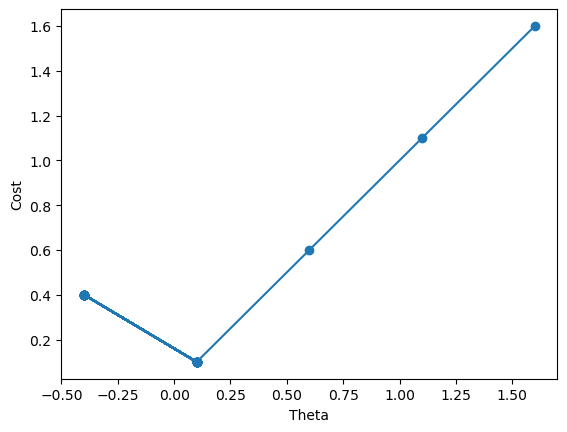

In [122]:
parameter_history, cost_history = gradient_descent(g=g, alpha=0.5, max_its=30, w0=1.6)

# scatter shows the back and forth behavior of trying to min abs(x) with this learning rate
plt.scatter(parameter_history,cost_history)
plt.plot(parameter_history,cost_history)


plt.xlabel("Theta")
plt.ylabel("Cost")

plt.plot()

# note the oscillations! Look at the points below to see how we are just moving bacj and forwarth between those 3 points 
print(parameter_history)
print(cost_history)

8) [15 points] Make a run of max_its=30 steps of gradient descent with initialization at the point $w^0 = 1.6$, using the diminishing rule $\alpha = \frac{1}{k^{1.5}}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wiehgt history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [123]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function 

    if alpha =='diminishing': 
        lr = lambda x:  1 / (x ** 1.5)
    else:
        lr = lambda x: alpha

    x = w0
    weight_history = [x]
    cost_history = [g(x)]

    for k in range(1,max_its+1):
        
        x = x - (lr(k) * gradient(x))
        weight_history.append(x)
        cost_history.append(g(x))

    return weight_history,cost_history

[]

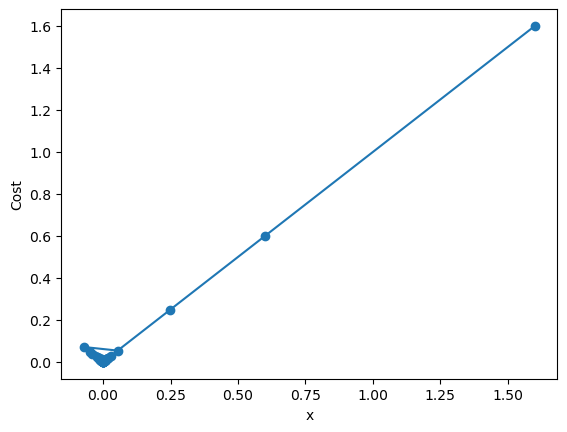

In [124]:
parameter_history, cost_history = gradient_descent(g=g, alpha="diminishing", max_its=30, w0=1.6)
#parameter_history2, cost_history2 = gradient_descent(g=g, alpha=0.5, max_its=30, w0=1.6)

# scatter shows the back and forth behavior of trying to min abs(x) with this learning rate
plt.scatter(parameter_history,cost_history)
plt.plot(parameter_history,cost_history)


plt.xlabel("x")
plt.ylabel("Cost")
plt.plot()


9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why?

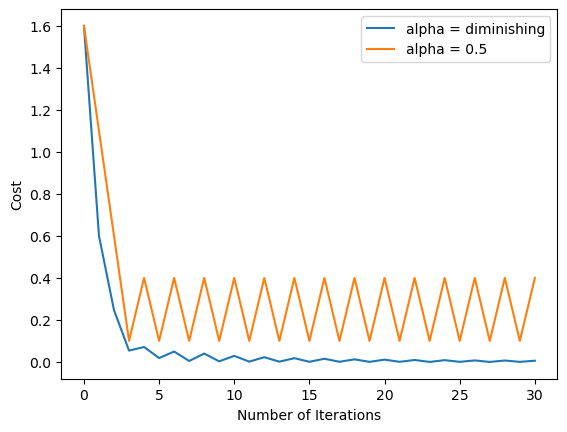

In [125]:
parameter_history1, cost_history1 = gradient_descent(g=g, alpha="diminishing", max_its=30, w0=1.6)
parameter_history2, cost_history2 = gradient_descent(g=g, alpha=0.5, max_its=30, w0=1.6)

plt.plot(cost_history1, label="alpha = diminishing")
plt.plot(cost_history2, label="alpha = 0.5")


plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# we can see that the diminishing learning rate works better because it avoids the large hops over the global min. We take smaller steps as we get closer and closer to the global min point

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 3\sin(w_0 + 3w_1) + 10$ 

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [126]:
import autograd.numpy as np
from autograd import grad

# need to use there np functions so that it is supported for autograd computations

def g(w):
    return w[0] ** 2 + w[1] ** 2 + 3 * np.sin(w[0] + 3*w[1]) + 10

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  
    x = np.array(w0)

    if alpha =='diminishing': 
        lr = lambda x:  1 / (x ** 1.5)
    else:
        lr = lambda x: alpha

    weight_history = [x]

    cost_history = [g(x)]

    for k in range(1,max_its+1):

        x = x - np.array((lr(k) * gradient(x)))
        weight_history.append(x)
        cost_history.append(g(x))

    return weight_history,cost_history

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [10.0,-10.0]
max_its = 30

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



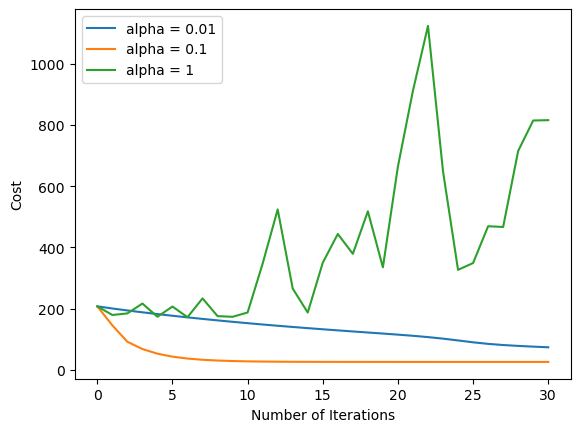

[ 5.90511844 -7.41853595]
[-1.23698528 -3.94707416]
[-18.91540529 -16.74621586]


In [127]:
# could be good to show students this!
#https://www.desmos.com/3d
# "z=x^{2}+y^{2}+3\cdot\sin(x+3y)+10"


w0 = [10.0,-10.0]
max_its = 30

parameter_history1, cost_history1 = gradient_descent(g=g, alpha=0.01, max_its=max_its, w0=w0)
parameter_history2, cost_history2 = gradient_descent(g=g, alpha=0.1, max_its=max_its, w0=w0)
parameter_history3, cost_history3 = gradient_descent(g=g, alpha=1, max_its=max_its, w0=w0)

plt.plot(cost_history1, label="alpha = 0.01")
plt.plot(cost_history2, label="alpha = 0.1")
plt.plot(cost_history3, label="alpha = 1")

plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# where on the function we are when the iteration number is 22 is consistent with what we see on desmos! 
# Alpha = 1 leads to a back and forth behavior
print(parameter_history1[23])
print(parameter_history2[23])
print(parameter_history3[23])

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 3w_0^2 + 2w_1^2 +3w_2^2$

Assume your $w^0$= [1,2,1] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha. Generate a single plot of the cost as a function of the number of iterations. What was your intuition for the selection of alpha values? Which value of alpha seems to converge the fastest?

Note that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

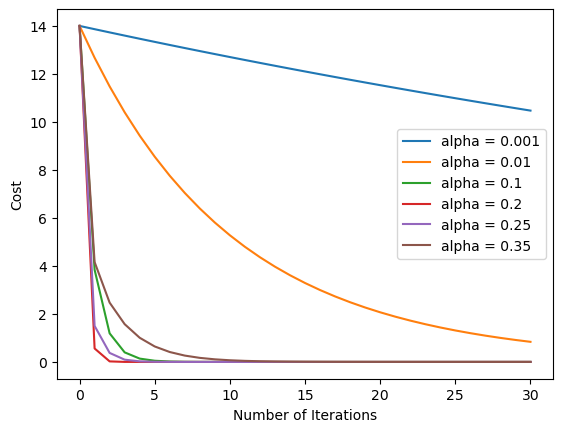

In [128]:
import autograd.numpy as np
from autograd import grad

def g(w):
    return 3*w[0]**2 + 2*w[1] ** 2 +3*w[2] ** 2

w0= [1.0,2.0,1.0]
max_iter = 100

parameter_history0, cost_history0 = gradient_descent(g=g, alpha=0.001, max_its=max_its, w0=w0)
parameter_history1, cost_history1 = gradient_descent(g=g, alpha=0.01, max_its=max_its, w0=w0)
parameter_history2, cost_history2 = gradient_descent(g=g, alpha=0.1, max_its=max_its, w0=w0)
parameter_history3, cost_history3 = gradient_descent(g=g, alpha=0.2, max_its=max_its, w0=w0)
parameter_history4, cost_history4 = gradient_descent(g=g, alpha=0.25, max_its=max_its, w0=w0)
parameter_history5, cost_history5 = gradient_descent(g=g, alpha=0.3, max_its=max_its, w0=w0)


plt.plot(cost_history0, label="alpha = 0.001")
plt.plot(cost_history1, label="alpha = 0.01")
plt.plot(cost_history2, label="alpha = 0.1")
plt.plot(cost_history3, label="alpha = 0.2")
plt.plot(cost_history4, label="alpha = 0.25")
plt.plot(cost_history5, label="alpha = 0.35")

plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# as we make out lr larger, we seem to be converging to the min point quicker up to a certain point. Once we get past lr = 0.2, our loss starts to converge slower. if we make the lr larger than 0.3, it diverges!